In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
users_df = pd.read_csv('users.csv')
feedback_df = pd.read_csv('recommendations.csv')
games_df = pd.read_csv('games.csv')

In [3]:
users_df.head(10)

,user_id,products,reviews
0,7360263,359,0
1,14020781,156,1
2,8762579,329,4
3,4820647,176,4
4,5167327,98,2
5,5664667,145,5
6,5889167,447,2
7,7281762,1083,1
8,7445952,273,1
9,7462927,51,1


In [4]:
import json

with open('games_metadata.json', 'r', encoding='utf-8') as f:
    data = f.readlines()


json_data = '[' + ','.join(data) + ']'

metadata = pd.read_json(json_data)

In [5]:
metadata.head()

,app_id,description,tags
0,13500,Enter the dark underworld of Prince of Persia ...,"[Action, Adventure, Parkour, Third Person, Gre..."
1,22364,,[Action]
2,113020,Monaco: What's Yours Is Mine is a single playe...,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St..."
3,226560,Escape Dead Island is a Survival-Mystery adven...,"[Zombies, Adventure, Survival, Action, Third P..."
4,249050,Dungeon of the Endless is a Rogue-Like Dungeon...,"[Roguelike, Strategy, Tower Defense, Pixel Gra..."


In [6]:
users_df.shape

(14306064, 3)

In [7]:
feedback_df.head(10)

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
0,975370,0,0,2022-12-12,True,36.3,51580,0
1,304390,4,0,2017-02-17,False,11.5,2586,1
2,1085660,2,0,2019-11-17,True,336.5,253880,2
3,703080,0,0,2022-09-23,True,27.4,259432,3
4,526870,0,0,2021-01-10,True,7.9,23869,4
5,306130,0,0,2021-10-10,True,8.6,45425,5
6,238960,0,0,2017-11-25,True,538.8,88282,6
7,730,0,0,2021-11-30,False,157.5,63209,7
8,255710,0,0,2021-05-21,True,18.7,354512,8
9,289070,0,0,2020-05-26,True,397.5,454422,9


Пользователь с ID 13933393 провел наибольшее количество часов: 290694.2


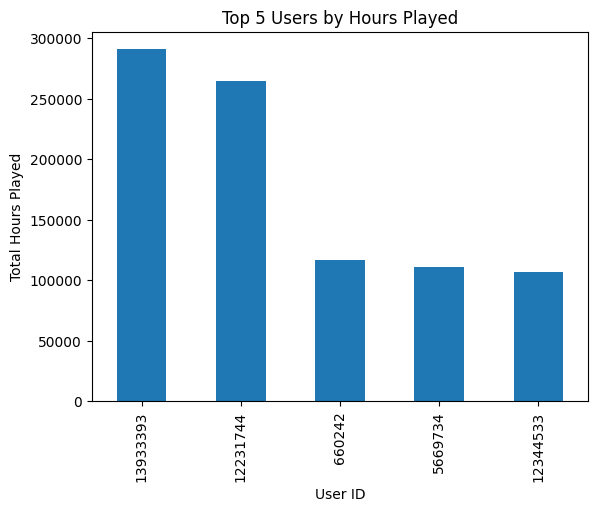

In [8]:
top_users = feedback_df.groupby('user_id')['hours'].sum()
top_user_id = top_users.idxmax()
max_hours = top_users.max()

print(f"Пользователь с ID {top_user_id} провел наибольшее количество часов: {max_hours}")

top_5_users = top_users.nlargest(5)
top_5_users.plot(kind='bar', xlabel='User ID', ylabel='Total Hours Played', title='Top 5 Users by Hours Played')
plt.show()

In [9]:
user_reviews = feedback_df[feedback_df['user_id'] == top_user_id]
top_game_id = user_reviews.loc[user_reviews['hours'].idxmax(), 'app_id']
max_hours_in_game = user_reviews['hours'].max()

print(f"Игра с ID {top_game_id} была игрой, в которой пользователь с ID {top_user_id} провел наибольшее количество часов: {max_hours_in_game}")
games_df[games_df['app_id'] == 226860]

Игра с ID 226860 была игрой, в которой пользователь с ID 13933393 провел наибольшее количество часов: 999.2


,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
2690,226860,Galactic Civilizations III,2019-10-24,True,False,False,Mostly Positive,76,8051,39.99,39.99,0.0,True


In [10]:
feedback_df.shape

(41154794, 8)

In [11]:
games_df.head(10)

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True
5,250180,METAL SLUG 3,2015-09-14,True,False,False,Very Positive,90,5579,7.99,7.99,0.0,True
6,253980,Enclave,2013-10-04,True,True,True,Mostly Positive,75,1608,4.99,4.99,0.0,True
7,271850,Men of War: Assault Squad 2 - Deluxe Edition u...,2014-05-16,True,False,False,Mixed,61,199,6.99,6.99,0.0,True
8,282900,Hyperdimension Neptunia Re;Birth1,2015-01-29,True,False,False,Very Positive,94,9686,14.99,14.99,0.0,True
9,19810,The Sum of All Fears,2008-10-10,True,False,False,Mostly Positive,75,33,9.99,9.99,0.0,True


In [12]:
games_df.shape

(50872, 13)

In [13]:
games_descr = pd.merge(games_df, metadata[['app_id', 'description']], on='app_id', how='left')
games_descr.head(10)

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,description
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True,Enter the dark underworld of Prince of Persia ...
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True,
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True,Monaco: What's Yours Is Mine is a single playe...
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True,Escape Dead Island is a Survival-Mystery adven...
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True,Dungeon of the Endless is a Rogue-Like Dungeon...
5,250180,METAL SLUG 3,2015-09-14,True,False,False,Very Positive,90,5579,7.99,7.99,0.0,True,"“METAL SLUG 3”, the masterpiece in SNK’s emble..."
6,253980,Enclave,2013-10-04,True,True,True,Mostly Positive,75,1608,4.99,4.99,0.0,True,Experience incredibly atmospheric and intense ...
7,271850,Men of War: Assault Squad 2 - Deluxe Edition u...,2014-05-16,True,False,False,Mixed,61,199,6.99,6.99,0.0,True,
8,282900,Hyperdimension Neptunia Re;Birth1,2015-01-29,True,False,False,Very Positive,94,9686,14.99,14.99,0.0,True,"Packed with fast-paced, turn-based RPG action,..."
9,19810,The Sum of All Fears,2008-10-10,True,False,False,Mostly Positive,75,33,9.99,9.99,0.0,True,Lead a team of domestic counter-terrorism expe...


In [14]:
data = pd.merge(users_df, feedback_df, on='user_id')
data = pd.merge(data, games_df, on='app_id')

In [15]:
data.head()

,user_id,products,reviews,app_id,helpful,funny,date,is_recommended,hours,review_id,...,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,14020781,156,1,730,0,0,2020-09-13,True,515.9,388620,...,True,True,True,Very Positive,88,7494460,15.0,0.0,0.0,True
1,5167327,98,2,730,2,0,2013-12-20,True,990.9,898452,...,True,True,True,Very Positive,88,7494460,15.0,0.0,0.0,True
2,6614910,62,1,730,2,0,2014-04-23,True,267.3,3083505,...,True,True,True,Very Positive,88,7494460,15.0,0.0,0.0,True
3,10122690,34,2,730,3,0,2019-06-26,True,937.0,33948654,...,True,True,True,Very Positive,88,7494460,15.0,0.0,0.0,True
4,4410864,18,1,730,5,0,2018-12-14,True,376.8,1614038,...,True,True,True,Very Positive,88,7494460,15.0,0.0,0.0,True


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41154794 entries, 0 to 41154793
Data columns (total 22 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         int64  
 1   products        int64  
 2   reviews         int64  
 3   app_id          int64  
 4   helpful         int64  
 5   funny           int64  
 6   date            object 
 7   is_recommended  bool   
 8   hours           float64
 9   review_id       int64  
 10  title           object 
 11  date_release    object 
 12  win             bool   
 13  mac             bool   
 14  linux           bool   
 15  rating          object 
 16  positive_ratio  int64  
 17  user_reviews    int64  
 18  price_final     float64
 19  price_original  float64
 20  discount        float64
 21  steam_deck      bool   
dtypes: bool(5), float64(4), int64(9), object(4)
memory usage: 5.7+ GB


In [17]:
data.shape

(41154794, 22)

In [18]:
data['positive_ratio'].unique()

array([ 88,  92,  86,  80,  40,  97,  89,  82,  71,  57,  85,  78,  94,
        96,  91,  76,  53,  75,  83,  98,  42,  59,  81,  93,  95,  90,
        61,  43,  70,  84,  50,  72,  87,  77,  79,  49,  66,  65,  74,
        73,  64,  47,  56,  58,  51,  55,  69,  62,  52,  14,  22,  13,
        15,  63,  46,  67,  60,  68,  18,  48,  54,  44,  34,  23,  36,
        41,  26,  37,  33,  29,  27, 100,  17,  35,  19,  45,  20,  39,
        38,  10,  99,  30,  25,  21,  32,  31,  12,  11,  28,  24,  16,
         5,   0,   3,   9,   6,   8,   7,   4], dtype=int64)

In [19]:
data_grouped = data.groupby('app_id').positive_ratio.mean()

In [20]:
data_grouped.sort_values(ascending=False).head(10)

app_id
1285870    100.0
1414280    100.0
1409340    100.0
1410070    100.0
1410200    100.0
1410260    100.0
1410440    100.0
1900400    100.0
1410620    100.0
1410700    100.0
Name: positive_ratio, dtype: float64

## <strong>Рекомендации на основе словесного описания (games_descr)</strong>

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel


subset_data = games_descr.sample(frac=0.1, random_state=42)
subset_descriptions = subset_data['description']

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(subset_descriptions)
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

def get_recommendations(title):
    idx = games_descr.index[games_descr['title'] == title].tolist()[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    most_similar_indices = [i[0] for i in sim_scores[1:11]]
    recommended_games = games_descr['title'].iloc[most_similar_indices]
    return recommended_games

recommended_games = get_recommendations('Call of Duty League™ - Launch Pack')
print(recommended_games)


1603                         Yet Another Zombie Survivors
3402                      Holy Potatoes! We’re in Space?!
2936                                           Pawnbarian
1565      MY HERO ONE'S JUSTICE 2 DLC Pack 2: Mei Hatsume
5020                                           HellEscape
526                                ABYSS OF THE SACRIFICE
2453                IL-2 Sturmovik: Battle of Bodenplatte
821     Freddi Fish and the Case of the Missing Kelp S...
2773                         Order of Battle: Morning Sun
3843                        Love n War: Warlord by Chance
Name: title, dtype: object


In [22]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

recommended_games = get_recommendations('Call of Duty League™ - Launch Pack')
print(recommended_games)

1603                         Yet Another Zombie Survivors
3402                      Holy Potatoes! We’re in Space?!
2936                                           Pawnbarian
1565      MY HERO ONE'S JUSTICE 2 DLC Pack 2: Mei Hatsume
5020                                           HellEscape
526                                ABYSS OF THE SACRIFICE
2453                IL-2 Sturmovik: Battle of Bodenplatte
821     Freddi Fish and the Case of the Missing Kelp S...
2773                         Order of Battle: Morning Sun
3843                        Love n War: Warlord by Chance
Name: title, dtype: object


## <strong>Фильтрация по коллаборации</strong>

In [23]:
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds

In [31]:
import random

subset_feedback_df = feedback_df.sample(frac=0.0001, random_state=42)

user_reviews = subset_feedback_df.pivot(index='user_id', columns='app_id', values='hours')
user_reviews = user_reviews.fillna(0)

user_reviews_mean = user_reviews.mean(axis=1)
user_reviews_demeaned = user_reviews - user_reviews_mean.values.reshape(-1, 1)

U, sigma, Vt = svds(user_reviews_demeaned.values, k=50)

sigma = np.diag(sigma)
predicted_reviews = np.dot(np.dot(U, sigma), Vt) + user_reviews_mean.values.reshape(-1, 1)
predicted_reviews_df = pd.DataFrame(predicted_reviews, columns=user_reviews.columns)


In [32]:
games_feedback_df = pd.merge(feedback_df, games_df[['app_id', 'title']], on='app_id', how='left')


In [33]:
def recommend_games(user_id, num_recommendations=5):
    if user_id not in predicted_reviews_df.index:
        return "User with id {} is not found in the predicted reviews dataframe.".format(user_id)
    
    sorted_user_predictions = predicted_reviews_df.loc[user_id].sort_values(ascending=False)
    top_recommendations = sorted_user_predictions.head(num_recommendations)
    
    recommendations_with_titles = pd.merge(top_recommendations.reset_index(), games_feedback_df[['app_id', 'title']], 
                                           on='app_id', how='left')
    recommendations_with_titles.drop_duplicates(inplace=True)
    
    return recommendations_with_titles

In [37]:
recommended_games = recommend_games(6, 5)
print(recommended_games)

         app_id         6             title
0        304930  0.033238          Unturned
155229     9900  0.029489  Star Trek Online
169978  1187510  0.026757    Rock Simulator
170525   228380  0.026515         Wreckfest
184983  1072040  0.026001    Panzer Corps 2


## <strong>Фильтрация по коллаборации (поиск похожих друг на друга пользователей)</strong>

In [38]:
from scipy.sparse import coo_matrix
from sklearn.neighbors import NearestNeighbors

user_ids = feedback_df['user_id'].astype('category').cat.codes
item_ids = feedback_df['app_id'].astype('category').cat.codes


unique_user_ids = feedback_df['user_id'].astype('category').cat.categories
unique_item_ids = feedback_df['app_id'].astype('category').cat.categories

user_game_matrix = coo_matrix((feedback_df['hours'], (user_ids, item_ids)))

model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
model_knn.fit(user_game_matrix)


distances, indices = model_knn.kneighbors(user_game_matrix.getrow(0), n_neighbors=6)
recommended_users = [unique_user_ids[i] for i in indices.flatten()[1:]]
print(f'Recommended users for the first user are: {recommended_users}')

Recommended users for the first user are: [11422900, 7483536, 9284221, 6590596, 11161013]


## <strong>Фильтрация на основе контента</strong>

In [46]:
subset_games_df = games_df.sample(frac=0.0001, random_state=42)


tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(subset_games_df['title'])
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)


similar_indices = cosine_similarities[0].argsort()[:-6:-1]
recommended_games = [subset_games_df ['title'].iloc[i] for i in similar_indices]
print(f'Recommended games for the first game are: {recommended_games}')

Recommended games for the first game are: ['Super Blackjack Battle 2 Turbo Edition - The Card Warriors', 'The Mutational', 'Long Road', 'Watching Delusion', 'Galactic Dominion']


## <strong>Гибридная система</strong>

In [40]:
import numpy as np

def get_similar_users(user_id, user_game_matrix, model_knn, n_neighbors=6):
    distances, indices = model_knn.kneighbors(user_game_matrix.getrow(user_id), n_neighbors=n_neighbors)
    similar_users = [unique_user_ids[i] for i in indices.flatten()[1:]]
    return similar_users

unique_game_ids = feedback_df['app_id'].astype('category').cat.categories

def get_similar_games(game_id, tfidf_matrix, n_neighbors=6):
    game_index = np.where(unique_game_ids == game_id)[0][0]
    cosine_similarities = linear_kernel(tfidf_matrix[game_index], tfidf_matrix).flatten()
    similar_indices = cosine_similarities.argsort()[:-n_neighbors:-1]
    similar_games = [games_df['title'].iloc[i] for i in similar_indices]
    return similar_games


def recommend_games(user_id):
    similar_users = get_similar_users(user_id, user_game_matrix, model_knn)
    similar_games = []
    for user in similar_users:
        user_games = feedback_df[feedback_df['user_id'] == user]['app_id'].unique()
        for game_id in user_games:
            similar_games.extend(get_similar_games(game_id, tfidf_matrix))
    return similar_games

In [42]:
recommend_games(3094)

['Kite',
 'The Kite',
 'Little Kite',
 'Relaxing Kite',
 'Stunt Kite Masters VR',
 "Spy Fox in 'Dry Cereal'",
 'Spy Fox In: Cheese Chase',
 "Spy Fox 3 'Operation Ozone'",
 'Spy Fox In: Hold the Mustard',
 "Spy Fox 2 'Some Assembly Required'",
 "Spy Fox in 'Dry Cereal'",
 'Spy Fox In: Cheese Chase',
 "Spy Fox 3 'Operation Ozone'",
 'Spy Fox In: Hold the Mustard',
 "Spy Fox 2 'Some Assembly Required'",
 "Spy Fox in 'Dry Cereal'",
 'Spy Fox In: Cheese Chase',
 "Spy Fox 3 'Operation Ozone'",
 'Spy Fox In: Hold the Mustard',
 "Spy Fox 2 'Some Assembly Required'",
 "Spy Fox in 'Dry Cereal'",
 'Spy Fox In: Cheese Chase',
 "Spy Fox 3 'Operation Ozone'",
 'Spy Fox In: Hold the Mustard',
 "Spy Fox 2 'Some Assembly Required'",
 "Spy Fox in 'Dry Cereal'",
 'Spy Fox In: Cheese Chase',
 "Spy Fox 3 'Operation Ozone'",
 'Spy Fox In: Hold the Mustard',
 "Spy Fox 2 'Some Assembly Required'"]